# Partie 3 - Modélisation et évaluation des modèles

# Exercice 1

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv('weather_data_1000_cleaned.csv')
df.head()

,Date,Temperature,Precipitation,Humidity,Latitude,Longitude,Temperature_F,Is_Hot,Temp_Fahrenheit
0,2023-01-01 12:00:00,14.8,0,33.1,30.828749,-71.000954,58.64,0,58.64
1,2023-01-01 21:00:00,8.4,0,52.3,82.762384,-19.613587,47.12,0,47.12
2,2023-01-02 04:00:00,14.6,0,56.7,-19.278880,-106.536820,58.28,0,58.28
3,2023-01-03 00:00:00,7.5,0,60.7,-23.008814,-34.082870,45.50,0,45.50
4,2023-01-03 10:00:00,14.1,0,53.7,-20.029257,174.475612,57.38,0,57.38


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Données
x = df.drop(['Temperature', 'Temperature_F', 'Temp_Fahrenheit', 'Date'], axis=1) # features
y = df['Temperature'] # target

# Split des données
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
x__train_normalized = scaler.fit_transform(x_train)

# On utilise transform et non fit_transform pour utiliser la même transformation que pour x_train
# On ne veut pas recalculer les moyennes et écarts-types
x_test_normalized = scaler.transform(x_test)

# Modèle
model = LinearRegression()
model.fit(x__train_normalized, y_train)

# Prédiction
y_pred = model.predict(x_test_normalized)

# Evaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 5.731526449828193
R2: 0.7311387669497867


# Exercice 2

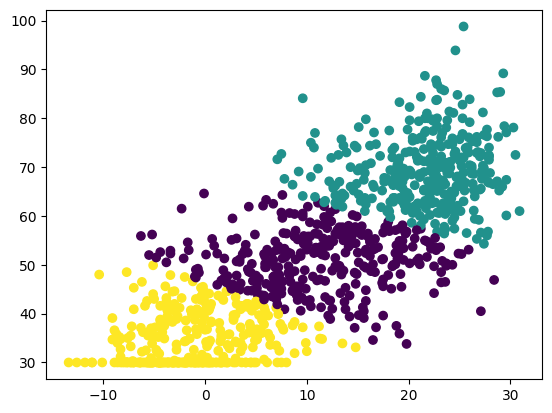

In [48]:
from sklearn.cluster import KMeans

# Données
df1 = df[['Temperature', 'Humidity']]

# Normalisation
scaler = StandardScaler()
df1_normalized = scaler.fit_transform(df1)

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df1)
plt.scatter(df1['Temperature'], df1['Humidity'], c=kmeans.labels_)